In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import chi2

In [35]:
df = pd.read_csv("https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv",sep=",")
df

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,24,8,One year,Yes,84.80,1990.50,No
7039,2234-XADUH,Female,0,72,7,One year,Yes,103.20,7362.90,No
7040,4801-JZAZL,Female,0,11,2,Month-to-month,Yes,29.60,346.45,No
7041,8361-LTMKD,Male,1,4,3,Month-to-month,Yes,74.40,306.60,Yes


In [36]:
arr = np.array(df)
arr

array([['7590-VHVEG', 'Female', 0, ..., 29.85, 29.85, 'No'],
       ['5575-GNVDE', 'Male', 0, ..., 56.95, 1889.5, 'No'],
       ['3668-QPYBK', 'Male', 0, ..., 53.85, 108.15, 'Yes'],
       ...,
       ['4801-JZAZL', 'Female', 0, ..., 29.6, 346.45, 'No'],
       ['8361-LTMKD', 'Male', 1, ..., 74.4, 306.6, 'Yes'],
       ['3186-AJIEK', 'Male', 0, ..., 105.65, 6844.5, 'No']], dtype=object)

In [37]:
df

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,24,8,One year,Yes,84.80,1990.50,No
7039,2234-XADUH,Female,0,72,7,One year,Yes,103.20,7362.90,No
7040,4801-JZAZL,Female,0,11,2,Month-to-month,Yes,29.60,346.45,No
7041,8361-LTMKD,Male,1,4,3,Month-to-month,Yes,74.40,306.60,Yes


In [38]:
df.drop(labels = 'customerID' , axis = 1 , inplace = True ) 
df

,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,Male,0,34,4,One year,No,56.95,1889.50,No
2,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,Male,0,45,4,One year,No,42.30,1840.75,No
4,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...
7038,Male,0,24,8,One year,Yes,84.80,1990.50,No
7039,Female,0,72,7,One year,Yes,103.20,7362.90,No
7040,Female,0,11,2,Month-to-month,Yes,29.60,346.45,No
7041,Male,1,4,3,Month-to-month,Yes,74.40,306.60,Yes


In [39]:
df.describe()

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7016.000000
mean,0.162147,32.371149,5.446259,64.761692,2282.589168
std,0.368612,24.559481,1.964916,30.090047,2265.506114
min,0.000000,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,4.000000,35.500000,401.925000
50%,0.000000,29.000000,6.000000,70.350000,1397.100000
75%,0.000000,55.000000,7.000000,89.850000,3792.325000
max,1.000000,72.000000,9.000000,118.750000,8684.800000


In [40]:
df.info

<bound method DataFrame.info of       gender  SeniorCitizen  tenure  ServiceCount        Contract  \
0     Female              0       1             2  Month-to-month   
1       Male              0      34             4        One year   
2       Male              0       2             4  Month-to-month   
3       Male              0      45             4        One year   
4     Female              0       2             2  Month-to-month   
...      ...            ...     ...           ...             ...   
7038    Male              0      24             8        One year   
7039  Female              0      72             7        One year   
7040  Female              0      11             2  Month-to-month   
7041    Male              1       4             3  Month-to-month   
7042    Male              0      66             7        Two year   

     PaperlessBilling  MonthlyCharges  TotalCharges Churn  
0                 Yes           29.85         29.85    No  
1                  

In [41]:
df['gender'].fillna(method="ffill",inplace=True)
df['SeniorCitizen'].fillna(method="ffill",inplace=True)
df['tenure'].fillna(method="ffill",inplace=True)
df['ServiceCount'].fillna(method="ffill",inplace=True)
df['Contract'].fillna(method="ffill",inplace=True)
df['PaperlessBilling'].fillna(method="ffill",inplace=True)
df['MonthlyCharges'].fillna(method="ffill",inplace=True)
df['TotalCharges'].fillna(method="ffill",inplace=True)
df['Churn'].fillna(method="ffill",inplace=True)

In [42]:
df['SeniorCitizen'] = pd.to_numeric(df["SeniorCitizen"],errors = 'coerce')
df['tenure'] = pd.to_numeric(df["tenure"],errors = 'coerce')
df['ServiceCount'] = pd.to_numeric(df["ServiceCount"],errors = 'coerce')
df['MonthlyCharges'] = pd.to_numeric(df["MonthlyCharges"],errors = 'coerce')
df['TotalCharges'] = pd.to_numeric(df["TotalCharges"],errors = 'coerce')

df['SeniorCitizen'] = df['SeniorCitizen'].astype('Int64')
df['tenure'] = df['tenure'].astype('Int64')
df['ServiceCount'] = df['ServiceCount'].astype('Int64')
df['MonthlyCharges'] = df['MonthlyCharges'].astype('Float64')
df['TotalCharges'] = df['TotalCharges'].astype('Float64')

In [43]:
df

,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,Male,0,34,4,One year,No,56.95,1889.5,No
2,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,Male,0,45,4,One year,No,42.3,1840.75,No
4,Female,0,2,2,Month-to-month,Yes,70.7,151.65,Yes
...,...,...,...,...,...,...,...,...,...
7038,Male,0,24,8,One year,Yes,84.8,1990.5,No
7039,Female,0,72,7,One year,Yes,103.2,7362.9,No
7040,Female,0,11,2,Month-to-month,Yes,29.6,346.45,No
7041,Male,1,4,3,Month-to-month,Yes,74.4,306.6,Yes


In [44]:
df = df.drop_duplicates()

In [45]:
# clean data 
df

,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,Male,0,34,4,One year,No,56.95,1889.5,No
2,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,Male,0,45,4,One year,No,42.3,1840.75,No
4,Female,0,2,2,Month-to-month,Yes,70.7,151.65,Yes
...,...,...,...,...,...,...,...,...,...
7038,Male,0,24,8,One year,Yes,84.8,1990.5,No
7039,Female,0,72,7,One year,Yes,103.2,7362.9,No
7040,Female,0,11,2,Month-to-month,Yes,29.6,346.45,No
7041,Male,1,4,3,Month-to-month,Yes,74.4,306.6,Yes


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6983 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            6983 non-null   object 
 1   SeniorCitizen     6983 non-null   Int64  
 2   tenure            6983 non-null   Int64  
 3   ServiceCount      6983 non-null   Int64  
 4   Contract          6983 non-null   object 
 5   PaperlessBilling  6983 non-null   object 
 6   MonthlyCharges    6983 non-null   Float64
 7   TotalCharges      6983 non-null   Float64
 8   Churn             6983 non-null   object 
dtypes: Float64(2), Int64(3), object(4)
memory usage: 579.6+ KB


In [47]:
meanSeniorCitizen = df["SeniorCitizen"].mean()
meantenure = df["tenure"].mean()
meanServiceCount = df["ServiceCount"].mean()
meanMonthlyCharges = df["MonthlyCharges"].mean()
meanTotalCharges = df["TotalCharges"].mean()

In [48]:
df_2 = pd.DataFrame()
df_2['tenure'] = df['tenure']
df_2['ServiceCount'] = df['ServiceCount']
df_2['MonthlyCharges'] = df['MonthlyCharges']
df_2['TotalCharges'] = df['TotalCharges']

In [49]:
df_2

,tenure,ServiceCount,MonthlyCharges,TotalCharges
0,1,2,29.85,29.85
1,34,4,56.95,1889.5
2,2,4,53.85,108.15
3,45,4,42.3,1840.75
4,2,2,70.7,151.65
...,...,...,...,...
7038,24,8,84.8,1990.5
7039,72,7,103.2,7362.9
7040,11,2,29.6,346.45
7041,4,3,74.4,306.6


In [50]:
dataCorr = df_2.corr()
dataCorr

,tenure,ServiceCount,MonthlyCharges,TotalCharges
tenure,1.000000,0.513522,0.240886,0.819121
ServiceCount,0.513522,1.000000,0.047256,0.445368
MonthlyCharges,0.240886,0.047256,1.000000,0.646372
TotalCharges,0.819121,0.445368,0.646372,1.000000


<AxesSubplot:>

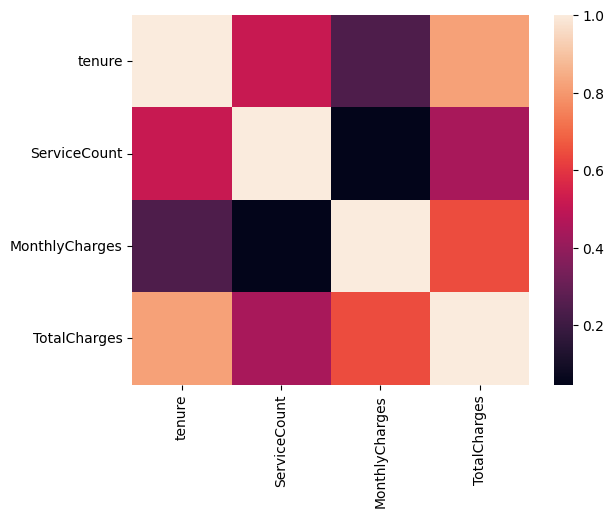

In [51]:
sns.heatmap(dataCorr)

In [52]:
lower = pd.DataFrame(np.tril(dataCorr, -1),columns = dataCorr.columns)
lower

,tenure,ServiceCount,MonthlyCharges,TotalCharges
0,0.000000,0.000000,0.000000,0.0
1,0.513522,0.000000,0.000000,0.0
2,0.240886,0.047256,0.000000,0.0
3,0.819121,0.445368,0.646372,0.0


In [53]:
to_drop = [column for column in lower if any(lower[column] > 0.6)]

In [54]:
df_2

,tenure,ServiceCount,MonthlyCharges,TotalCharges
0,1,2,29.85,29.85
1,34,4,56.95,1889.5
2,2,4,53.85,108.15
3,45,4,42.3,1840.75
4,2,2,70.7,151.65
...,...,...,...,...
7038,24,8,84.8,1990.5
7039,72,7,103.2,7362.9
7040,11,2,29.6,346.45
7041,4,3,74.4,306.6


In [55]:
df_2.drop(to_drop, inplace=True, axis=1)
df_2

,ServiceCount,TotalCharges
0,2,29.85
1,4,1889.5
2,4,108.15
3,4,1840.75
4,2,151.65
...,...,...
7038,8,1990.5
7039,7,7362.9
7040,2,346.45
7041,3,306.6


In [56]:
df_2.describe()

,ServiceCount,TotalCharges
count,6983.000000,6983.000000
mean,5.448804,2302.515838
std,1.961585,2265.428301
min,1.000000,18.800000
25%,4.000000,418.000000
50%,6.000000,1415.550000
75%,7.000000,3828.825000
max,9.000000,8684.800000


In [57]:
df_3 = pd.DataFrame()
df_3['Churn'] = df['Churn']
df_3

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [58]:
lebel = preprocessing.LabelEncoder()
lebel.fit(df_3['Churn'])
df_3['chrun_transform'] = lebel.transform(df_3['Churn'])


lebel.fit(df['gender'])
df_3['gender'] = lebel.transform(df['gender'])

lebel.fit(df['Contract'])
df_3['Contract'] = lebel.transform(df['Contract'])

lebel.fit(df['PaperlessBilling'])
df_3['PaperlessBilling'] = lebel.transform(df['PaperlessBilling'])

In [59]:
df_3

,Churn,chrun_transform,gender,Contract,PaperlessBilling
0,No,0,0,0,1
1,No,0,1,1,0
2,Yes,1,1,0,1
3,No,0,1,1,0
4,Yes,1,0,0,1
...,...,...,...,...,...
7038,No,0,1,1,1
7039,No,0,0,1,1
7040,No,0,0,0,1
7041,Yes,1,1,0,1


In [60]:

df

,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,Male,0,34,4,One year,No,56.95,1889.5,No
2,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,Male,0,45,4,One year,No,42.3,1840.75,No
4,Female,0,2,2,Month-to-month,Yes,70.7,151.65,Yes
...,...,...,...,...,...,...,...,...,...
7038,Male,0,24,8,One year,Yes,84.8,1990.5,No
7039,Female,0,72,7,One year,Yes,103.2,7362.9,No
7040,Female,0,11,2,Month-to-month,Yes,29.6,346.45,No
7041,Male,1,4,3,Month-to-month,Yes,74.4,306.6,Yes


In [61]:
Output = pd.DataFrame()
Variables = pd.DataFrame()

Output['Chrun'] = df_3['chrun_transform']

Variables['gender'] = df_3['gender']
Variables['Contract'] = df_3['Contract']
Variables['PaperlessBilling'] = df_3['PaperlessBilling']

In [62]:
Chi_table = chi2(Variables,Output)

In [63]:
Chi_table

(array([1.69032850e-01, 1.09997055e+03, 1.01928373e+02]),
 array([6.80972779e-001, 3.35186442e-241, 5.75660495e-024]))

In [64]:
df_4 = pd.DataFrame()
df_4['ServiceCount']  = df['ServiceCount'] 
df_4['TotalCharges']  = df['TotalCharges'] 
df_4['gender']  = Variables['gender'] 
df_4['PaperlessBilling']  = Variables['PaperlessBilling'] 
df_4['Contract'] = Variables['Contract'] 
df_4['Chrun']  = Output['Chrun'] 

In [65]:

df_4

,ServiceCount,TotalCharges,gender,PaperlessBilling,Contract,Chrun
0,2,29.85,0,1,0,0
1,4,1889.5,1,0,1,0
2,4,108.15,1,1,0,1
3,4,1840.75,1,0,1,0
4,2,151.65,0,1,0,1
...,...,...,...,...,...,...
7038,8,1990.5,1,1,1,0
7039,7,7362.9,0,1,1,0
7040,2,346.45,0,1,0,0
7041,3,306.6,1,1,0,1


In [66]:
p_value = Chi_table[1]
p_value

array([6.80972779e-001, 3.35186442e-241, 5.75660495e-024])

In [67]:
Variables.columns

Index(['gender', 'Contract', 'PaperlessBilling'], dtype='object')

In [68]:
lower = pd.DataFrame(np.tril(p_value, -1),columns = Variables.columns)

In [69]:
lower

,gender,Contract,PaperlessBilling
0,0.000000,0.000000e+00,0.0
1,0.680973,0.000000e+00,0.0
2,0.680973,3.351864e-241,0.0


In [70]:
to_drop = [column for column in lower if any(lower[column] > 0.05)] 

In [71]:
to_drop
df_4.drop(to_drop, inplace=True, axis=1)
df_4

,ServiceCount,TotalCharges,PaperlessBilling,Contract,Chrun
0,2,29.85,1,0,0
1,4,1889.5,0,1,0
2,4,108.15,1,0,1
3,4,1840.75,0,1,0
4,2,151.65,1,0,1
...,...,...,...,...,...
7038,8,1990.5,1,1,0
7039,7,7362.9,1,1,0
7040,2,346.45,1,0,0
7041,3,306.6,1,0,1
